# Day 2: Basics of Statistics and Basics of Machine Learning

- Random Variables
- Common Distributions
- Linear Regression
- Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Day 2: Basics of Machine Learning

### Linear Regression

#### Loading and inspecting the data

We will use a dataset about various species of insects (Source: CrossValidated).  We will be interested in explaining how the insects wing span varies, as influenced by the other measurements in the dataset.

Our first step is to take a quick look at the raw data.

In [2]:
!head ./data/insects.csv

continent	latitude	wingsize	sex
1	40.5	941.111111111	0
1	42.0	924.444444444	0
1	43.6	924.204444444	0
1	45.7	915.217777778	0
1	45.9	905.471111111	0
1	47.4	896.004444444	0
1	50.0	913.0	0
1	51.8	916.44	0
1	53.8	933.417777778	0


**Discussion:** How would you describe this dataset?  How many variables are there?  How would you describe these variables?

It looks like there are four columns in our dataset: `continent`, `latitude`, `wingsize`, and `sex`.

Elements in rows are separated from each other using a tab character; this type of format is often called "tab-separated data".

In [3]:
insects_df = pd.read_csv('./data/insects.csv', sep='\t')

Now we have the data in a Python object:

In [4]:
insects_df.head()

,continent,latitude,wingsize,sex
0,1,40.5,941.111111,0
1,1,42.0,924.444444,0
2,1,43.6,924.204444,0
3,1,45.7,915.217778,0
4,1,45.9,905.471111,0


We've got our four columns `continent`, `latitude`, `wingsize`, and `sex`.

We can see some short descriptions of their qualities using `info`:

In [5]:
insects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
continent    42 non-null int64
latitude     42 non-null float64
wingsize     42 non-null float64
sex          42 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


#### Looking at the data

We can get a first feel for how the quantities in our data are spread out using **histograms**:

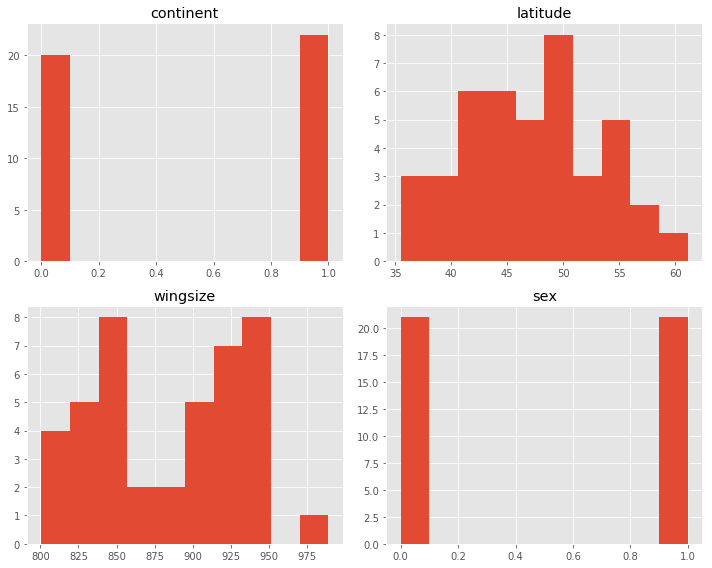

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, column in zip(axs.flatten(), insects_df.columns):
    ax.hist(insects_df[column])
    ax.set_title(column)

fig.tight_layout()

**Discussion:** What did you learn from these histograms?  How do they help you describe the data?

Some observations:

- `continent` and `sex` take only two values.  There are two continents represented in the data, labeled zero and one as well as two sexes (probably Male and Female), also labeled zero and one.

These zero/one columns are called **binary** or **indicator variables**, they measure a specific yes/no condition.

- The values of `wingspan` cluster into two distinct groups.  This is very interesting and worthy of further investigation.

#### Scatterplots

Histograms are useful, but limited, as they do not reveal anything about the *relationships between the columns in our data*.  Insread, we will turn to undoubtedly  the most effective and flexible visualization: the **scatterplot**.

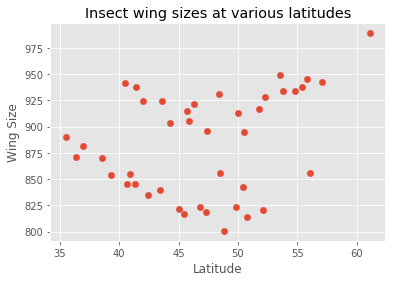

In [7]:
_, ax = plt.subplots()

ax.scatter(insects_df.latitude, insects_df.wingsize, s=40)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Insect wing sizes at various latitudes')

Here we have a scatterplot of `wingsize` against `latitude`.

**Discussion:** What patterns do you see in the scatterplot.  Can you form any hypothesis about the data?

Here are some thoughts:

- The most prominent feature of this data is the two bands.  There seem to be two very well defined elongated clusters of data, with the average wing size in one cluster much greater than in the other.
- Within each cluster there is noticeable tendency for wing size to first decrease and then increase as latitude varies.

This leads to a few questions we may wish to answer with the data.

1. Are the two clusters associated with one of the other two variables in the dataset, continent or sex?
2. Is the increase of wing size as latitude increases real or illusory?

Let's answer each of these questions.

#### Are the two clusters associated with either continent or sex?

We can discover if the two clusters in the data are associated with either `continent` or `sex` through a well chosen visualization.  Let's make the same scatterplot from before, but color each point either red or blue, according to the value of `continent` or `sex`.

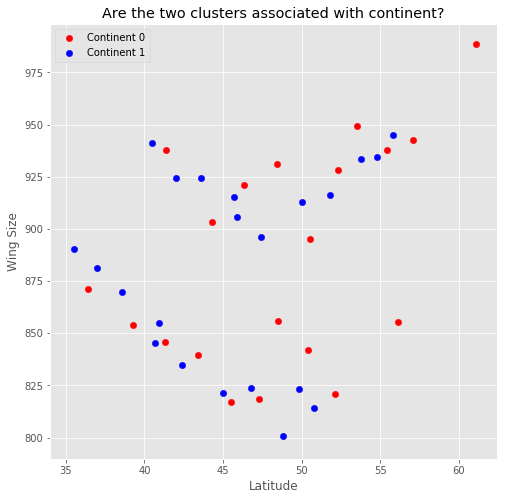

In [8]:
_, ax = plt.subplots(figsize=(8, 8))

for continent, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.continent == continent]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='Continent {}'.format(continent))

ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Are the two clusters associated with continent?')

ax.legend()

Values of different continents seem scattered randomly across the two clusters, so it does **not** seem like continent is associated with the clusters.

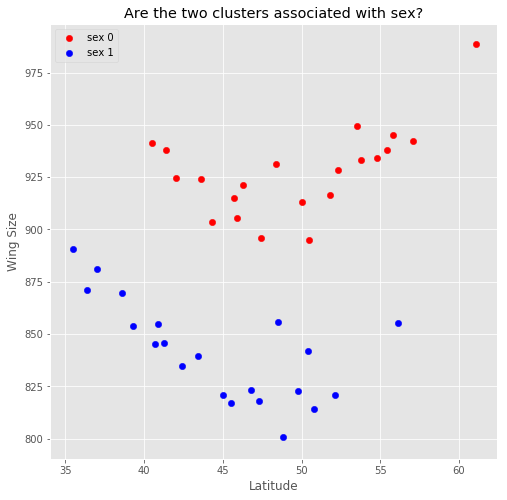

In [9]:
_, ax = plt.subplots(figsize=(8, 8))

for sex, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.sex == sex]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='sex {}'.format(sex))

ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Are the two clusters associated with sex?')

ax.legend()

There we go!

This is pretty definitive, the cluster of the larger insects are all female, and the cluster of smaller insects are all male.  This seems like enough evidence to conclude that the sex of the insect causes the data to cluster into two groups.

#### Is an increasing latitude associated with a larger wing size?

This question is a little more sophisticated, and we need some new technology to answer it.

The idea is to create an equation:

$$wingsize \approx a + b \cdot latitude$$

Then we can look at the number $b$, which tells us how we should expect `wingsize` to change as `latitude` changes.  If we find that $b > 0$, that's evidence that an increasing latitude is associated with an increasing wingspan.

I'll skip the technicalities, but the basic tool for creating equations like this is called **linear regression**.

In [10]:
model = smf.ols(formula='wingsize ~ latitude', data=insects_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     4.595
Date:                                   Prob (F-statistic):             0.0382
Time:                                   Log-Likelihood:                -220.17
No. Observations:                  42   AIC:                             444.3
Df Residuals:                      40   BIC:                             447.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    765.1966     56.276     13.597      0.000     651.458     878.935
latitude       2.5400      1.185      2.144      0.038       0.145       4.935
==============================================================================
Omnibus:                        7.752   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                3.189
Skew:                          -0.380   Prob(JB):                        0.203
Kurtosis:                       1.884   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression estimated the equation as:

$$wingsize \approx 765+ 2.54 \times latitude$$

So we can expect, on average, an increase of 2.54 wing size for every additional latitude.

But is this really meaningful?  We need to make sure our model is representing the data honestly.

One way we can visualize this is to look at the equation as the equation for a line. If we *know* the latitude that we find an insect, we can *predict* the wing span using the equation.  If we plot the latitudes verses the predictions, we get a line.

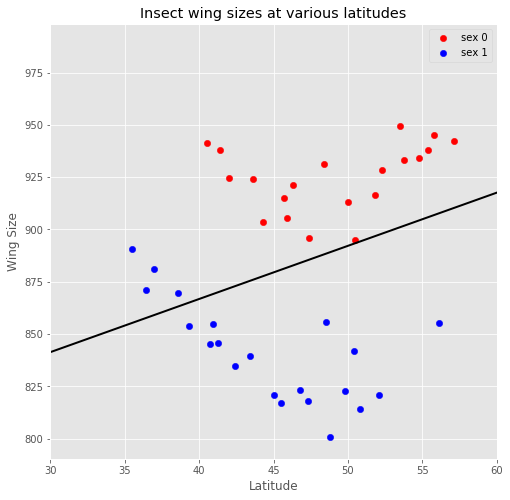

In [11]:
_, ax = plt.subplots(figsize=(8, 8))

for sex, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.sex == sex]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='sex {}'.format(sex))

# Draw the linear regression predictions
latitudes = np.linspace(30, 60, num=250)
wingsizes_hat = model.params[0] + model.params[1] * latitudes
ax.plot(latitudes, wingsizes_hat, linewidth=2, c='black')

ax.set_xlim(30, 60)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Insect wing sizes at various latitudes')
ax.legend()

This plot demonstrates two serious flaws in our model:

- The model has no knowledge of the sex of the insect, so the fit line attemps to bisect the two clusters of data.
- The model cannot account for the curvature in the data points.  The model attempts to fit a line to data that does not have a linear shape.

#### Accounting for the insects' sex

One way to account for the insects' sex is to modify our equation by adding a new term:

$$wingsize \approx a + b \cdot latitude + c \cdot sex$$

Again, linear regression can find an equation of this shape describing the data:

In [12]:
model = smf.ols(formula='wingsize ~ latitude + sex', data=insects_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     75.12
Date:                                   Prob (F-statistic):           4.21e-14
Time:                                   Log-Likelihood:                -189.29
No. Observations:                  42   AIC:                             384.6
Df Residuals:                      39   BIC:                             389.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    948.2463     31.665     29.947      0.000     884.199    1012.294
latitude      -0.4120      0.630     -0.653      0.517      -1.687       0.863
sex          -88.0281      7.699    -11.434      0.000    -103.600     -72.456
==============================================================================
Omnibus:                        3.802   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.698
Skew:                           0.587   Prob(JB):                        0.259
Kurtosis:                       3.404   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now have an estimate for the number $c$ of $-88$.  This means, that on average, an insect with `sex = 1` costs it about $-88$ in wingsize.

The predictions from this model now depend on whether an insect is male or female.  We have two lines of predictions, and the sex of the insect chooses which line to use:

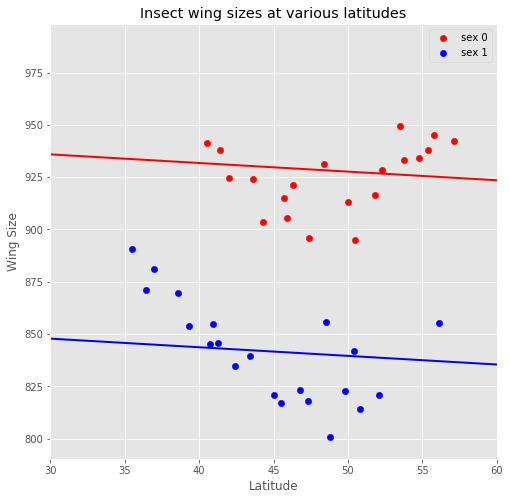

In [13]:
_, ax = plt.subplots(figsize=(8, 8))

for sex, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.sex == sex]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='sex {}'.format(sex))

# Draw the linear regression predictions
latitudes = np.linspace(30, 60, num=250)
for sex, color in ((0, 'red'), (1, 'blue')):
    wingsizes_hat = model.params[0] + model.params[1] * latitudes + model.params[2] * sex
    ax.plot(latitudes, wingsizes_hat, linewidth=2, c=color)

ax.set_xlim(30, 60)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Insect wing sizes at various latitudes')
ax.legend()

#### Accounting for the curvature of the data points

We can account for the curvature of the data points by using a *poynomial regression*.  This means that we fit powers of latitude bigger than one:

$$wingsize \approx a + b \cdot latitude + c \cdot latitude^2 +  d \cdot sex$$

In [14]:
model = smf.ols(formula='wingsize ~ latitude + I(latitude**2) + sex', data=insects_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     245.6
Date:                                   Prob (F-statistic):           6.48e-25
Time:                                   Log-Likelihood:                -159.14
No. Observations:                  42   AIC:                             326.3
Df Residuals:                      38   BIC:                             333.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1946.8863     91.875     21.191      0.000    1760.895    2132.878
latitude           -43.2140      3.893    -11.101      0.000     -51.094     -35.334
I(latitude ** 2)     0.4513      0.041     11.031      0.000       0.368       0.534
sex                -89.4629      3.807    -23.499      0.000     -97.170     -81.756
==============================================================================
Omnibus:                        5.109   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.052
Skew:                           0.508   Prob(JB):                        0.132
Kurtosis:                       4.133   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

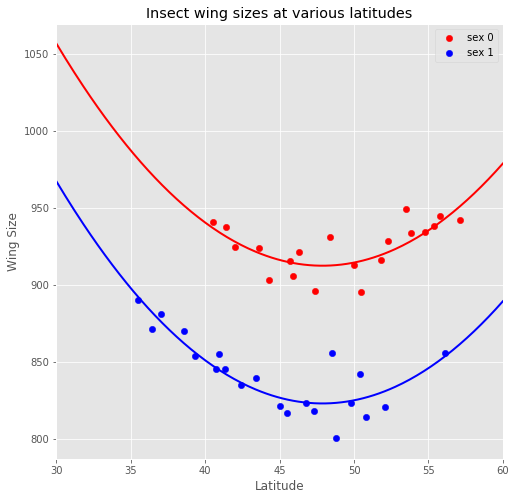

In [15]:
_, ax = plt.subplots(figsize=(8, 8))

for sex, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.sex == sex]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='sex {}'.format(sex))

# Draw the linear regression predictions
latitudes = np.linspace(30, 60, num=250)
for sex, color in ((0, 'red'), (1, 'blue')):
    wingsizes_hat = model.params[0] + model.params[1] * latitudes + model.params[2] * latitudes ** 2 + model.params[3] * sex
    ax.plot(latitudes, wingsizes_hat, linewidth=2, c=color)

ax.set_xlim(30, 60)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Insect wing sizes at various latitudes')
ax.legend()

This now looks like a good model that represents the data honestly.

#### How is the line fitted?

How did linear regression draw these lines and curves?  How were the coefficients estimated?

We can think of the fitted line as a *prediction*.  If we were to collect a new insect at a certain latitude, the y-coordinate of the line would be our best estiamte for the wing size of that insect.

A good strategy for drawing the line would seem to be: **draw the line that minimizes the dissimilarity between the predictions and the actual wing size.**

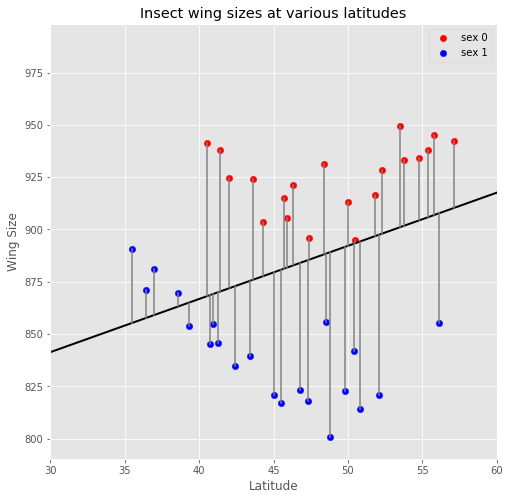

In [16]:
model = smf.ols(formula='wingsize ~ latitude', data=insects_df).fit()

_, ax = plt.subplots(figsize=(8, 8))

for sex, color in ((0, 'red'), (1, 'blue')):
    df = insects_df[insects_df.sex == sex]
    ax.scatter(df.latitude, df.wingsize, s=40, c=color, label='sex {}'.format(sex))

latitudes = np.linspace(30, 60, num=250)
wingsizes_hat = model.params[0] + model.params[1] * latitudes
ax.plot(latitudes, wingsizes_hat, linewidth=2, c='black')

wingsizes_hat = model.params[0] + model.params[1] * insects_df.latitude
for latitude, wingsize, wingsize_hat in zip(insects_df.latitude, insects_df.wingsize, wingsizes_hat):
    ax.plot((latitude, latitude), (wingsize, wingsize_hat), color='grey')

ax.set_xlim(30, 60)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wing Size')
ax.set_title('Insect wing sizes at various latitudes')
ax.legend()

In the picture above the vertical distance between each data point $y$ and its estimated value $\hat{y}$ are highlighted.

A common numeric measure of the dissimilarity is the *sum of squared residuals*:

$$SSR = \sum_{i=1}^{N}{( y_i - \hat{y}_i )^2}$$

**The linear regression line is the line that minimizes that sum of squared residuals.**

### Logistic Regression

With linear regression we predict some quantity that has a continuous range of values.  *Logistic Regression* solves a slightly different problem.  What if we wanted to predict the sex of an insect from the other measurements?

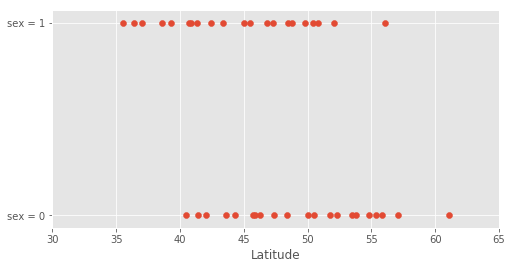

In [17]:
_, ax = plt.subplots(figsize=(8, 4))

# Scatterplot of the data
ax.scatter(insects_df.latitude, insects_df.sex)
ax.set_xlim([30, 65])
ax.set_yticks([0, 1])
ax.set_yticklabels(['sex = 0', 'sex = 1'])
ax.set_xlabel('Latitude')

Logistic regression attempts to estimate the probability that an insect is male ($sex = 1$) or female ($sex = 0$).

$$P(sex = 1 \mid latitude)$$

In [18]:
model = smf.logit(formula='sex ~ latitude', data=insects_df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.603191
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                   42
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            1
Date:                                   Pseudo R-squ.:                  0.1298
Time:                                   Log-Likelihood:                -25.334
converged:                       True   LL-Null:                       -29.112
                                        LLR p-value:                  0.005980
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3010      2.968      2.460      0.014       1.484      13.118
latitude      -0.1551      0.063     -2.474      0.013      -0.278      -0.032
==============================================================================
"""

Logistic regression attempts to draw a *curve* of predicted probabilities (not a line, as in linear regression).

The above logistic regression results in the following curve:

$$P(sex = 1 \mid latitude) = \frac{1}{1 + e^{-(7.3 - 0.16 \times latitude)}}$$

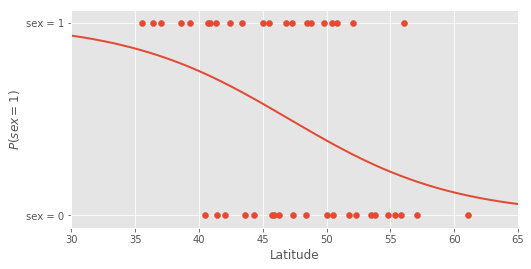

In [19]:
_, ax = plt.subplots(figsize=(8, 4))

ax.scatter(insects_df.latitude, insects_df.sex)

df = pd.DataFrame({'latitude': np.linspace(30, 65, num=250)})
ax.plot(df, model.predict(df), linewidth=2)

ax.set_xlim([30, 65])
ax.set_yticks([0, 1])
ax.set_yticklabels(['sex = 0', 'sex = 1'])
ax.set_xlabel('Latitude')
ax.set_ylabel('$P(sex = 1)$')

What if we need to make a binary decision, i.e., we need to use the estimated probabilities to actually classify each insect as either male or female?

We can accomplish this by thresholding probabilities:

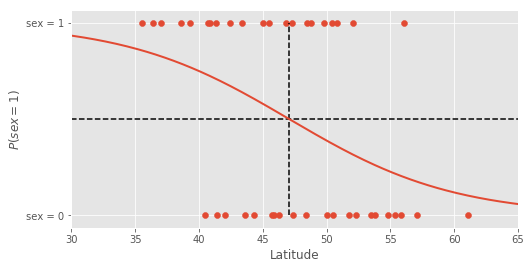

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))

# Scatterplot of the data
ax.scatter(insects_df.latitude, insects_df.sex)

df = pd.DataFrame({'latitude': np.linspace(30, 65, num=250)})
ax.plot((30, 65), (0.5, 0.5), color='black', linestyle='--')
ax.plot((47.075, 47.075), (0, 1), color='black', linestyle='--')
ax.plot(df, model.predict(df), linewidth=2)

ax.set_xlim([30, 65])
ax.set_yticks([0, 1])
ax.set_yticklabels(['sex = 0', 'sex = 1'])
ax.set_xlabel('Latitude')
ax.set_ylabel('$P(sex = 1)$')

Here we threshold the probabilities at $0.5$, which divides the data into insects we predict are with `sex = 0` and insects we predict are with `sex = 1`.

Some datapoints are predicted incorrectly, these come in two types:

- **False Positives**: Insects we predict are in the positive class, but incorrectly.
- **False Negatives**: Insects we predict are in the negative class  but incorrectly.